In [1]:
import pandas as pd
import numpy as np

## Wczytanie słownika i wyfiltrowanie interesujących danych

In [2]:
df = pd.read_csv('./plwordnet_4_2/słownik_anotacji_emocjonlanej.csv')

In [3]:
nacechowania = pd.DataFrame(df.stopien_nacechowania).drop_duplicates()['stopien_nacechowania'].tolist()
nacechowania.remove(np.nan)
nacechowania

['- s', 'amb', '- m', '+ s', '+ m', '- s ']

In [4]:
df = df[df.stopien_nacechowania.isin(nacechowania)]
df

,lemat,wariant,czesc_mowy,jednostka_nacechowana,emocje,wartosciowane,stopien_nacechowania,przyklad1,przyklad2
2,abstrakcyjny,1,przymiotnik,Nie,wstręt;złość;zaskoczenie,niewiedza;błąd;nieużyteczność,- s,"Jej propozycje są zupełnie abstrakcyjne, nie d...",NaN
3,abstrakcyjny,1,przymiotnik,Nie,wstręt;złość,niewiedza;błąd;nieużyteczność,- s,"Nie wiem, jak powinnam powiedzieć mężowi, że j...",NaN
10,adorator,1,rzeczownik,Nie,złość;radość,szczęście;błąd,amb,Jola była piękną kobietą i miała wielu adorato...,Mój adorator był bardzo namolny.
11,adorator,1,rzeczownik,Nie,złość;cieszenie się na;radość;wstręt,szczęście;nieszczęście;błąd;dobro;nieużyteczność,amb,Franciszek był wytrwałym adoratorem Małgorzaty...,"Aktorka, nawet w rezydencji prywatnej, nie mog..."
18,afektowany,1,przymiotnik,Nie,złość;smutek,błąd;nieużyteczność,- s,Denerwował mnie jego afektowany sposób mówienia.,NaN
...,...,...,...,...,...,...,...,...,...
178505,zaciąć,11,czasownik,Nie,radość;,NaN,+ s,"Perkusista zaciął takie solo, że padliśmy z za...",NaN
178508,włóczyć,7,czasownik,Nie,złość;,nieużyteczność;błąd;,- s,Czy ty musisz włóczyć zdobycze śmietnikowe do ...,NaN
178509,włóczyć,7,czasownik,Nie,NaN,nieużyteczność;,- s,Po kiego grzyba włóczysz do domu te wszystkie ...,NaN
178512,obcierać się,6,czasownik,Nie,radość;smutek;strach;,dobro;szczęście;krzywda;nieszczęście;,amb,Nie mam ochoty po raz kolejny obcierać się o ś...,"Widziałem, że obcieram się o zwycięstwo."


In [5]:
word_sentiment_df = df[['lemat','stopien_nacechowania']].drop_duplicates()
word_sentiment_df

,lemat,stopien_nacechowania
2,abstrakcyjny,- s
10,adorator,amb
18,afektowany,- s
20,afera,- m
32,agonia,- s
...,...,...
178476,zrąbać,- s
178498,nawłóczyć,- s
178502,nawłóczyć się,- s
178504,zaciąć,+ s


In [6]:
word_sentiment_dict = {}
for index, row in word_sentiment_df.iterrows():
    word_sentiment_dict[row['lemat']] = row['stopien_nacechowania']

## Wczytanie tweetów do analizy

In [7]:
# pomocnicze funkcje

def flatten_dct_(prefix, dct):
    res = {}
    for key, value in dct.items():
        if not isinstance(value, dict):
            res[prefix + key] = value
        else:
            for key2, value2 in flatten_dct_(key+".", value).items():
                res[prefix+key2] = value2
    return res

def flatten_dct(dct):
    return flatten_dct_('', dct)



#### Wczytanie tweetów do pd.DataFrame

In [8]:
import pymongo

DB_CONN_STRING = "mongodb://localhost:27017/"
DB_NAME = "poland-covid-vaccine-tweets"
COLLECTION_NAME = "tweets"

mongo_client = pymongo.MongoClient(DB_CONN_STRING)
database_name = mongo_client[DB_NAME]
data_collection = database_name[COLLECTION_NAME]

projection = {"date":1, "content":1, "user.username":1, "user.id":1, "user.followersCount":1, "user.verified":1}
tweets = [flatten_dct(tweet) for tweet in data_collection.find({},projection)]
# print(tweets[0])

df = pd.DataFrame(tweets)
df

,_id,date,content,user.username,user.id,user.verified,user.followersCount
0,1244948603606630403,2020-03-31T11:24:11+00:00,$AZN Astrazeneca PLC SEC Filing: Form 6-K http...,StockTexts,772471873539977217,False,1776
1,1244574577923182593,2020-03-30T10:37:57+00:00,$AZN Astrazeneca PLC SEC Filing: Form 6-K http...,StockTexts,772471873539977217,False,1776
2,1243835202172002304,2020-03-28T09:39:56+00:00,@jarek_jjo @ImpactCEE @300gospodarka Super! Cz...,AndrzejBarban,1217555010533429250,False,6
3,1243203045418303488,2020-03-26T15:47:58+00:00,"@Novice_trader9 Shell/BP, BHP, AstraZeneca?",sivwardo,1026477719750692864,False,31
4,1243123703732482048,2020-03-26T10:32:41+00:00,$AZN Astrazeneca PLC SEC Filing: Form 6-K http...,StockTexts,772471873539977217,False,1776
...,...,...,...,...,...,...,...
370115,1344803654352728064,2021-01-01T00:32:31+00:00,Rzeczpospolita: Trudno o rekompensatę za szkod...,Arotoko,547197601,False,402
370116,1344800670134788096,2021-01-01T00:20:39+00:00,"Kochani, dobry początek roku. @PanZolty obieca...",pjotrowicz,989641938553966595,False,5833
370117,1344799918309965830,2021-01-01T00:17:40+00:00,@LeszekMiller Prawdziwego mężczyznę rozpoznaje...,kotapczan,1323947394870972416,False,70
370118,1344799426984947714,2021-01-01T00:15:43+00:00,"@rozznet Stać, to Unię, by szczepionkę kupić. ...",Grzegorz_Red,1302918570867912706,False,791


#### Wyczyszczenie tweetów z hashtagów, cytowań, linków... 

In [9]:
import re

def clean_up_tweet(tweet):
    tweet = ' ' + tweet + ' ' #added to simplify regex below
    tweet = re.sub(r' [$#@][^ ]* | http[^ ]* ', ' ', tweet)[1:-2]
    return re.sub(r'[^\w ]', '', tweet).lower()

df['content_cleaned'] = [clean_up_tweet(tw) for tw in df['content'].values]

#### Sprowadzenie słów do podstawowej formy gramatycznej

In [10]:
from stempel import StempelStemmer
stemmer = StempelStemmer.default()

Loading: 100%|█████████████████████████████████████████████████████| 2225192/2225192 [00:04<00:00, 526175.92bytes/s]


In [11]:
def to_base_grammar_form(tweet):
    result_tweet = ''
    for word in tweet.split(' '):
        if len(word) > 0:
            try:
                result_tweet += ' ' + stemmer.stem(word)
            except TypeError as e:
                result_tweet += ' ' + word
    return result_tweet[1:]

df['content_cleaned'] = [to_base_grammar_form(tw) for tw in df['content_cleaned'].values]

## Analiza sentymentu

In [12]:
def get_sentiment(tweet):
    sentiment = 0
    f = {
        '- s' : -0.5,
        '- s ': -0.5,
        '- m' : - 1,
        '+ s' : 0.5,
        '+ m' : 1,
        'amb' : 0
    }
    for word in tweet.split(' '):
        try:
            sentiment += f[word_sentiment_dict[word]]
#             print("Word: {} Elementar sentiment: {}".format(word, f[word_sentiment_dict[word]]))
        except KeyError:
            pass
        
    return sentiment

In [13]:
df['sentiment'] = [get_sentiment(tw) for tw in df['content_cleaned'].values]

In [14]:
# tw_idx = 370038
# print(df['content'][tw_idx] + "  --> " + str(get_sentiment(df['content_cleaned'][tw_idx])))

## Zmiany sentymentu w czasie

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# all_dates = [datetime.datetime.strptime(d[:10], "%Y-%m-%d").date() for d in df['date']]
# all_setiment = [s for s in df['sentiment']]

df_2 = df[['date','sentiment']]
df_2['date'] = df_2['date'].apply(lambda d: datetime.datetime.strptime(d[:10], "%Y-%m-%d").date())
df2_grouped = df_2.groupby(['date']).sum()

c:\python37-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


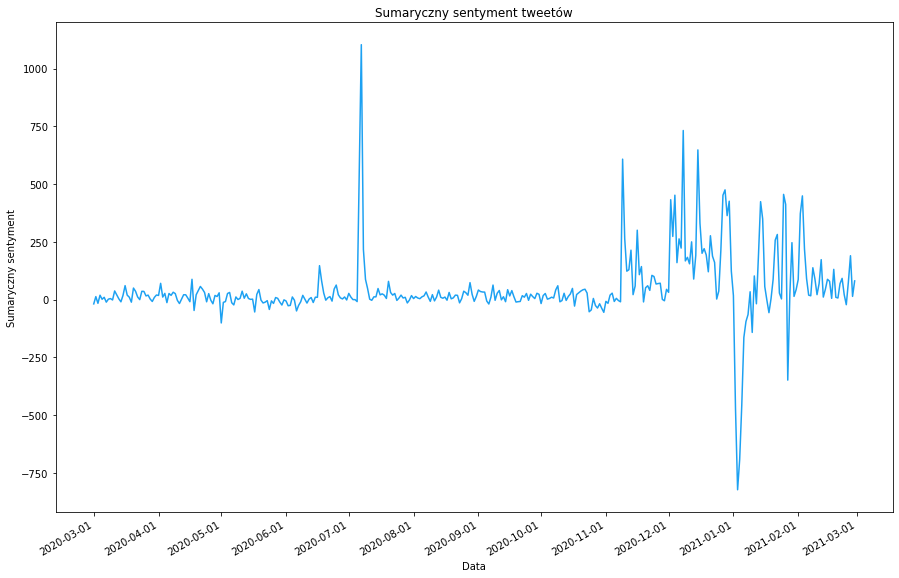

In [17]:
x_values = df2_grouped.index
y_values = df2_grouped['sentiment']

fig, ax = plt.subplots(figsize=(15,10))
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)


plt.xlabel("Data")
plt.ylabel("Sumaryczny sentyment")
plt.title("Sumaryczny sentyment tweetów")

plt.plot(x_values, y_values, '#1da1f2')
fig.autofmt_xdate()
# plt.xticks(rotation=45)
plt.show()

In [18]:
from_ = datetime.date(2020, 7, 6)
to_ = datetime.date(2020, 7, 8)

In [19]:
df_2 = df[['date','sentiment']]
df_2 = df_2[df_2['sentiment'] > 0]
# df_2['date'] = df_2['date'].apply(lambda d: datetime.datetime.strptime(d[:10], "%Y-%m-%d").date())
df_2['sentiment'] = df_2['sentiment'].apply(lambda x: 1)
df2_grouped = df_2.groupby(['date']).sum()

# df2_grouped = df2_grouped[df2_grouped.index > from_]
# df2_grouped = df2_grouped[df2_grouped.index < to_]

x_positive = df2_grouped.index
y_positive = df2_grouped['sentiment']

In [20]:
df_2 = df[['date','sentiment']]
df_2 = df_2[df_2['sentiment'] == 0]
# df_2['date'] = df_2['date'].apply(lambda d: datetime.datetime.strptime(d[:10], "%Y-%m-%d").date())
df_2['sentiment'] = df_2['sentiment'].apply(lambda x: 1)
df2_grouped = df_2.groupby(['date']).sum()

# df2_grouped = df2_grouped[df2_grouped.index > from_]
# df2_grouped = df2_grouped[df2_grouped.index < to_]

x_neutral = df2_grouped.index
y_neutral = df2_grouped['sentiment']

In [21]:
df_2 = df[['date','sentiment']]
df_2 = df_2[df_2['sentiment'] < 0]
# df_2['date'] = df_2['date'].apply(lambda d: datetime.datetime.strptime(d[:10], "%Y-%m-%d").date())
df_2['sentiment'] = df_2['sentiment'].apply(lambda x: 1)
df2_grouped = df_2.groupby(['date']).sum()

# df2_grouped = df2_grouped[df2_grouped.index > from_]
# df2_grouped = df2_grouped[df2_grouped.index < to_]

x_negative = df2_grouped.index
y_negative = df2_grouped['sentiment']

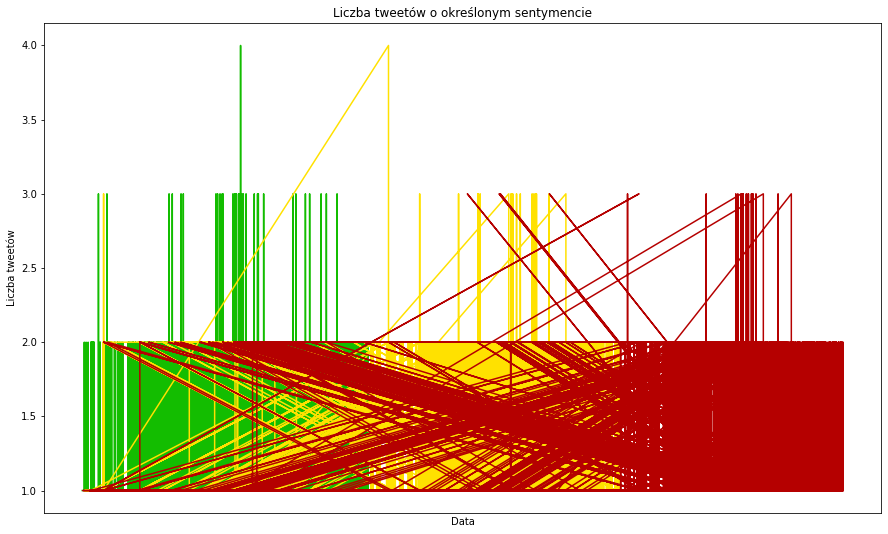

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)


plt.xlabel("Data")
plt.ylabel("Liczba tweetów")
plt.title("Liczba tweetów o określonym sentymencie")

plt.plot(x_positive, y_positive, '#13bd00')
plt.plot(x_neutral, y_neutral, '#ffe100')
plt.plot(x_negative, y_negative, '#b50000')
fig.autofmt_xdate()
# plt.xticks(rotation=45)
plt.show()

In [23]:
df_2 = df[['date','sentiment']]
df_2['sentiment'] = df_2['sentiment'].apply(lambda x: np.sign(x))
df_2['date'] = df_2['date'].apply(lambda d: datetime.datetime.strptime(d[:10], "%Y-%m-%d").date())
df2_grouped = df_2.groupby(['date']).sum()


x_values= df2_grouped.index
y_values = df2_grouped['sentiment']

c:\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


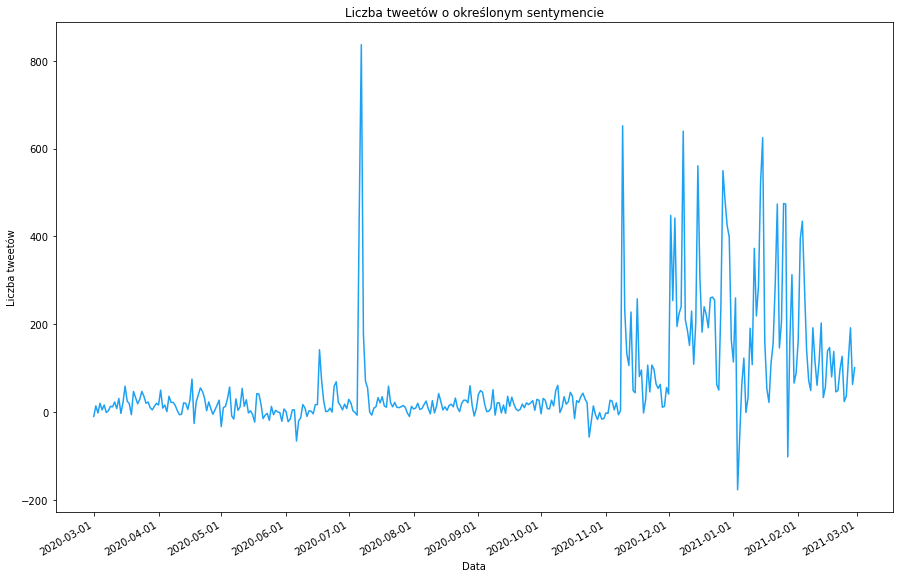

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)


plt.xlabel("Data")
plt.ylabel("Liczba tweetów")
plt.title("Liczba tweetów o określonym sentymencie")

plt.plot(x_values, y_values, '#1da1f2')
fig.autofmt_xdate()
# plt.xticks(rotation=45)
plt.show()

In [29]:
df['date'] = list(map(lambda d: datetime.datetime.strptime(d[:10], "%Y-%m-%d").date(), df['date']))

In [30]:
df_x = df[df['date'] > from_]
df_x = df_x[df_x['date'] < to_]
df_x

,_id,date,content,user.username,user.id,user.verified,user.followersCount,content_cleaned,sentiment
31876,1280466298254876673,2020-07-07,@Mateusz_lski @AndrzejDuda A. Duda będąc w USA...,iwona_paulewicz,798564287371481088,False,2041,andrzejdudo a dudo będący w us zgodzić się aby...,1.0
31877,1280438848728809472,2020-07-07,"@PremiumPPV @Junona_ Dobra, oszczędna moderna....",miloszlodowski,109541674,False,7782,junona_ dobra oszczędny modesy a cóż móc być w...,1.0
33137,1280645623113560064,2020-07-07,@MosinskiJan @BeataSzydlo @SchetynadlaPO A czy...,Wiosna97842774,1108368732852764675,False,95,beataszydlo a czy uważać ze szczepić na covid1...,1.5
33138,1280642734043381762,2020-07-07,@p_zuchowski @TomaszSiemoniak Ci ludzie są bez...,Normals99,1277700390398636033,False,2,tomaszsiemoniak ty lud są bezrefleksyjny wysta...,-1.0
33139,1280634958441316352,2020-07-07,@michalzag @UczkaLuczka @WojciechMucha @StZerk...,Kajtek13,26227665,False,22,uczkalć stzerko prezydent jaki obywatel mieć p...,0.0
...,...,...,...,...,...,...,...,...,...
42455,1280301961590517760,2020-07-07,Duda po #DebataPrezydencka \n\nAla nie w szcze...,RObywatel,1238485612396777472,False,1264,dudo po ala n w szczepionke,0.0
42456,1280298311757561857,2020-07-07,@AndrzejDuda Czyżby premier Pinokio wynalazł s...,krzysztofsta,2286705768,False,21,czyżba premier pinokio wynaleźć szczepionka na...,0.0
42457,1280294832565563399,2020-07-07,@AndrzejDuda @prezydentpl \nNasz prezydent mar...,raru1980,956497138330062848,False,94,prezydentplić nasz prezydent marionetka to str...,-0.5
42458,1280293208346497030,2020-07-07,@AndrzejDuda Andrzej powinien dostać medyczneg...,RabbitBunny83,764890028296331264,False,198,andrzeć powinien dostać medyczny nobl wymyślić...,0.0


In [45]:
df_x['content']

'@PremiumPPV @Junona_ Dobra, oszczędna moderna... A cóż może być w Krakowie? Siedziba nowoczesnej spółki teletechnicznej?'

In [107]:
sm = df_x.sample(n=1)
sm['content'].values[0]


'@RGwiazdowski W Polsce szczepienia obowiązkowe = nieodpłatne (refundowane). Jeśli szczepienia przeciwko COVID-19 miałyby być nieodpłatne dla seniorów (a to powiedział Prezydent w drugim zdaniu) tzn. ze byłyby obowiązkowe, a nie zalecane (odpłatne). https://t.co/qllFDoakPw'

In [104]:
sm['sentiment']

33244    1.0
Name: sentiment, dtype: float64